In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
type(X_train)

numpy.ndarray

In [9]:
# shape of the numpy arrays
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [10]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [11]:
print(X_train[10].shape)

(28, 28)


3


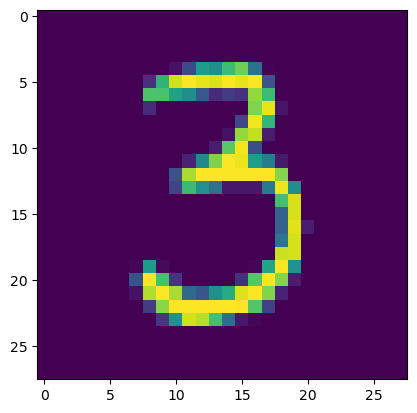

In [13]:
#displaying the image

plt.imshow(X_train[50])
plt.show

#print the corresponding label
print(y_train[50])

In [14]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [17]:
#unique value in Y_train
print(np.unique(y_train))
#unique value in Y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [18]:
# scaling values
X_train = X_train/255
X_test = X_test/255

In [19]:
print(X_train[50])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [21]:
#Building neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')    
])

In [22]:
#Compiling the neural network
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
#training the model
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2957 - accuracy: 0.9135
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1428 - accuracy: 0.9571
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1070 - accuracy: 0.9672
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0860 - accuracy: 0.9741
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9774
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0633 - accuracy: 0.9801
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0545 - accuracy: 0.9828
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0497 - accuracy: 0.9838
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0429 - accuracy: 0.9865
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.039

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1188 - accuracy: 0.9749
0.9749000072479248


In [26]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [27]:
Y_pred[10]

array([1.0000000e+00, 3.2636158e-03, 9.9497247e-01, 3.3919475e-04,
       1.6259004e-10, 9.7893655e-02, 4.7384150e-02, 4.6161094e-01,
       2.0448029e-02, 3.3342028e-01], dtype=float32)

In [30]:
# converting the prediction probabilities to class label
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 9, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 3, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [32]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, Y_pred_labels)

In [33]:
print(conf_mat)

tf.Tensor(
[[ 969    0    2    2    1    0    3    0    3    0]
 [   0 1125    3    1    0    0    3    1    2    0]
 [   3    2 1004    0    2    0    2   12    7    0]
 [   0    1    6  987    0    4    0    6    3    3]
 [   0    0    5    0  947    1    5    2    1   21]
 [   1    1    0   45    0  830    6    3    4    2]
 [   5    3    1    1    8   14  924    0    2    0]
 [   3    4    6    2    1    1    0 1006    1    4]
 [   5    1    7    7    1    7    1    4  936    5]
 [   2    2    0    4    8    5    0    7    2  979]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

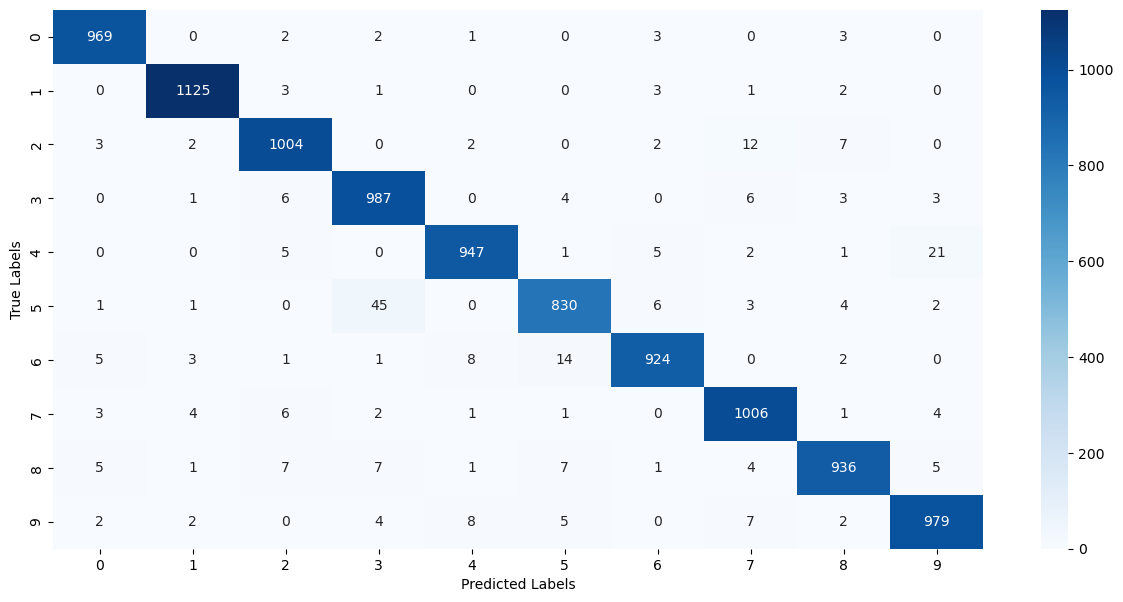

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')